## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> objetivo neste projeto é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> utilizei um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o meu objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>



### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore') 
 

## Leitura dos dados


In [2]:
dados = pd.read_csv("HousePrices_HalfMil.csv", sep = ';') 

## Visualização dos dados

In [3]:
dados.head(6)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
5,35450,148,2,5,2,0,0


## Tamanho do Dataset

In [4]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
dados.corr().round(2) 

# Tendem a não ter uma correlação forte entre as variáveis explicativas 
# O relacionamento entre elas é negativo, pois tendem a 0 e -1 
# 

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)

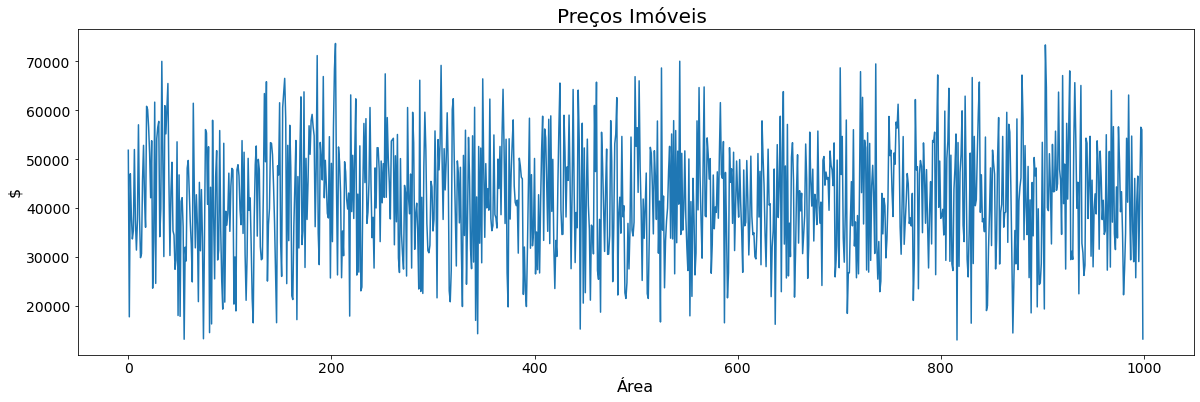

In [7]:
fig, ax = plt.subplots(figsize = (20,6)) 
ax.set_title("Preços Imóveis ", fontsize = 20) 
ax.set_ylabel("$", fontsize = 16) 
ax.set_xlabel("Área", fontsize = 16) 
ax = dados["precos"].plot(fontsize= 14) 

## Box plot da variável *dependente* (y)


<AxesSubplot:title={'center':'Preço dos Imóveis'}, ylabel='$'>

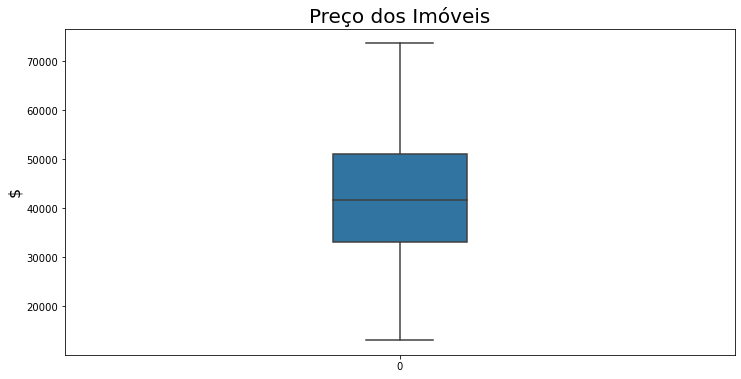

In [8]:
ax = sns.boxplot(data = dados["precos"], orient = "v", width = 0.2) 
ax.figure.set_size_inches (12,6) 
ax.set_title("Preço dos Imóveis", fontsize = 20) 
ax.set_ylabel("$", fontsize = 16) 
ax

Text(0.5, 0, 'Número de Garagem')

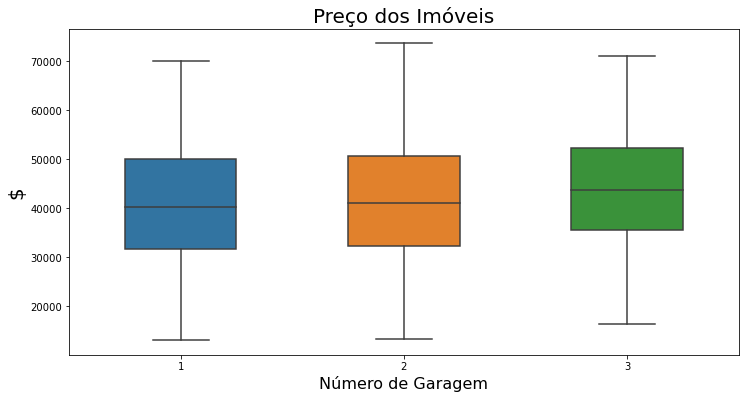

In [9]:
ax = sns.boxplot(y = "precos", x = "garagem", data = dados, orient = "v", width = 0.5) 
ax.figure.set_size_inches (12,6) 
ax.set_title("Preço dos Imóveis", fontsize = 20) 
ax.set_ylabel("$", fontsize = 20 ) 
ax.set_xlabel("Número de Garagem" , fontsize = 16) 



Text(0.5, 0, 'Número de Banheiro')

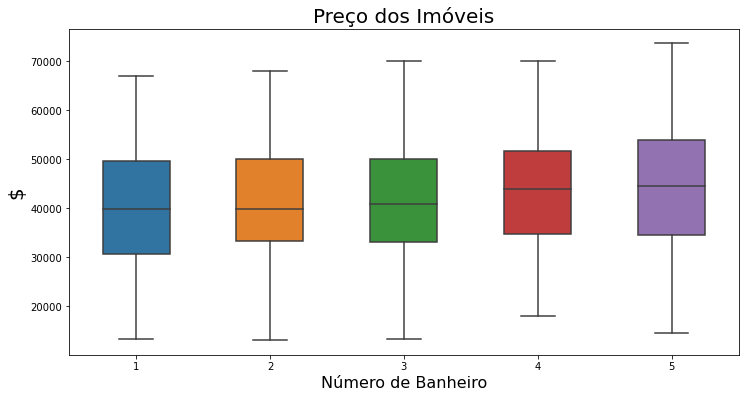

In [10]:
ax = sns.boxplot(y = "precos", x = "banheiros", data = dados, orient = "v", width = 0.5) 
ax.figure.set_size_inches(12,6) 
ax.set_title("Preço dos Imóveis", fontsize = 20) 
ax.set_ylabel("$", fontsize = 20 ) 
ax.set_xlabel("Número de Banheiro", fontsize = 16) 

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Número de Lareira', ylabel='$'>

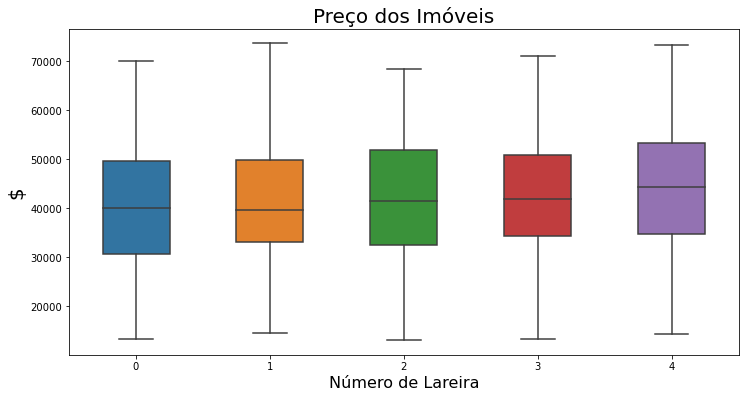

In [11]:
ax = sns.boxplot( y = "precos" , x = "lareira" , data = dados, orient = "v" , width = 0.5) 
ax.figure.set_size_inches(12,6) 
ax.set_title("Preço dos Imóveis", fontsize = 20 ) 
ax.set_ylabel("$" , fontsize  = 20) 
ax.set_xlabel("Número de Lareira" , fontsize = 16) 
ax


<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Acabamento em Mármore', ylabel='$'>

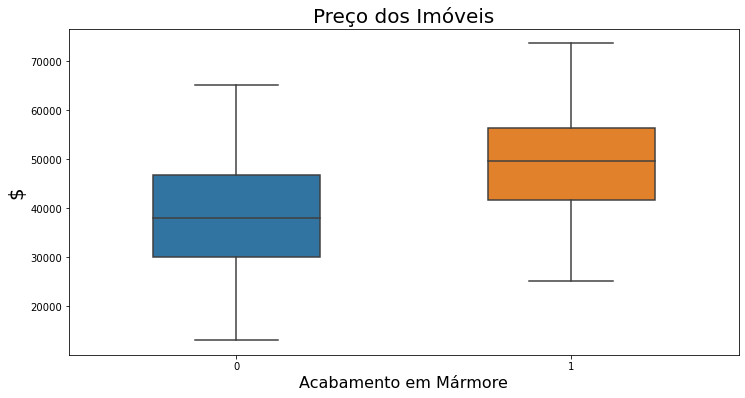

In [12]:
ax = sns.boxplot( y = "precos" , x = "marmore" , data = dados, orient = "v", width = 0.5) 
ax.figure.set_size_inches (12,6) 
ax.set_title("Preço dos Imóveis" , fontsize = 20 ) 
ax.set_ylabel ( "$", fontsize = 20 ) 
ax.set_xlabel("Acabamento em Mármore" , fontsize = 16) 
ax

Text(0.5, 0, 'Mais de um Andar')

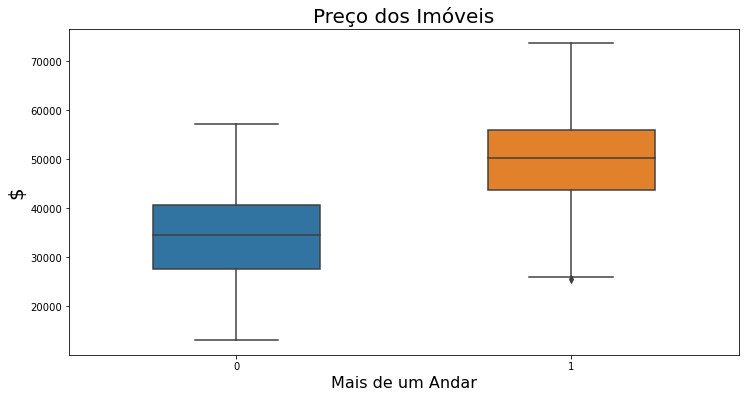

In [13]:
ax = sns.boxplot(y = 'precos', x = "andares", data = dados, orient = 'v' ,width = 0.5) 
ax.figure.set_size_inches(12,6) 
ax.set_title("Preço dos Imóveis",fontsize = 20) 
ax.set_ylabel("$", fontsize = 20)
ax.set_xlabel("Mais de um Andar", fontsize = 16) 

## Distribuição de frequências da variável *dependente* (y)

<AxesSubplot:title={'center':'Distribuição de Frquência'}, xlabel='$', ylabel='Frequência'>

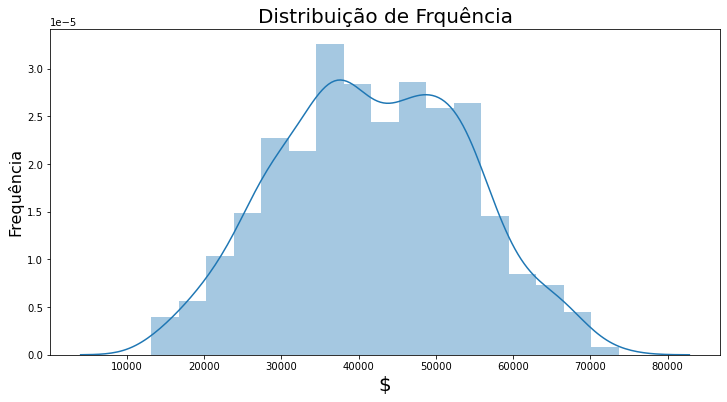

In [14]:
ax = sns.distplot(dados["precos"]) 
ax.figure.set_size_inches(12,6) 
ax.set_title("Distribuição de Frquência", fontsize = 20) 
ax.set_ylabel("Frequência", fontsize = 16) 
ax.set_xlabel("$", fontsize = 20)
ax

#Distribuição de frequência está assimétrica
#Variável depende segue uma distribuição normal 

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

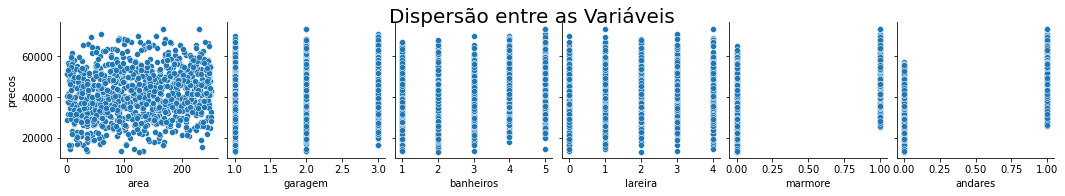

In [15]:
ax = sns.pairplot(dados, y_vars = "precos" , x_vars = ["area", "garagem" , "banheiros", "lareira", "marmore" , "andares"])
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize = 20, y=1.05) 
ax

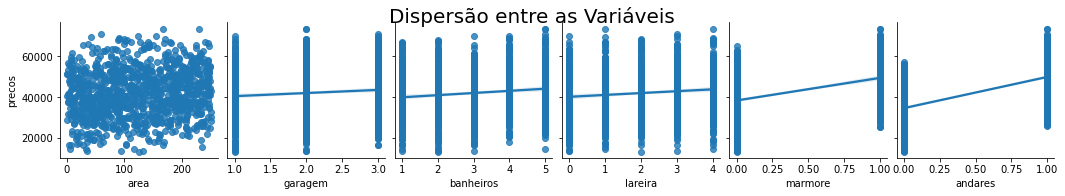

In [16]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind = 'reg') 
ax.fig.suptitle("Dispersão entre as Variáveis", fontsize = 20, y = 1.05 ) 
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [18]:
y = dados["precos"]

In [19]:
X = dados [["area", "garagem","banheiros", "lareira","marmore", "andares"]] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2811)

In [21]:
X_train.shape 

(700, 6)

In [22]:
X_test.shape

(300, 6)

In [23]:
X_test.shape[0] + X_test.shape[0]



600

In [24]:
X.shape[0] * 0.3 

300.0

In [25]:
X.shape[0] * 0.7

700.0

## Instanciando a classe *LinearRegression()*

In [26]:
modelo = LinearRegression() 

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [27]:
modelo.fit(X_train, y_train) 

LinearRegression()

In [28]:
print("R² {}".format(modelo.score(X_train, y_train).round(2))) 

R² 0.64


In [29]:
y_previsto = modelo.predict(X_test) 

In [30]:
print("R² = %s" %metrics.r2_score(y_test, y_previsto).round(2)) 

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

In [31]:
area = 38 
garagem = 2 
banheiros = 4 
lareira = 4 
marmore = 1 
andares = 1 
entrada = [[area, garagem, banheiros, lareira, marmore, andares]] 
print("${0:.2f}".format(modelo.predict(entrada)[0]))


$57521.57


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

In [32]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2) 
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2) 
R2 = metrics.r2_score(y_test, y_previsto).round(2) 

pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R²"], columns = ["Métricas"]) 

# EQM = Média dos quadrados dos erros. Ajustes melhores apresentam EQM abaixo. 
# REQM = Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam REQM abaixo. 
# R² = O coeficiente de determinação(R²) é uma medida resumida que diz quanto a linha de regressão ajusat-se aos dados.

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


In [33]:
import pickle 


In [34]:
output = open("modelo_imoveis" , "wb") 
pickle.dump(modelo, output) 
output.close() 


### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

## Exemplo de um simulador interativo para Jupyter


In [35]:
from ipywidgets import widgets, HBox, VBox
from IPython.display import display


area = widgets.Text(description="Área")
garagem = widgets.Text(description="Garagem")
banheiros = widgets.Text(description="Banheiros")
lareira = widgets.Text(description="Lareira")
marmore = widgets.Text(description="Mármore?")
andares = widgets.Text(description="Andares?")

botao = widgets.Button(description="Simular")

left = VBox([area, banheiros, marmore])
right = VBox([garagem, lareira, andares])
inputs = HBox([left, right])

def simulador(sender):
    entrada=[[
                float(area.value if area.value else 0), 
                float(garagem.value if garagem.value else 0), 
                float(banheiros.value if banheiros.value else 0), 
                float(lareira.value if lareira.value else 0), 
                float(marmore.value if marmore.value else 0), 
                float(andares.value if andares.value else 0)
             ]]
    print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))
    
botao.on_click(simulador) 

In [36]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())